In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [10]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [11]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


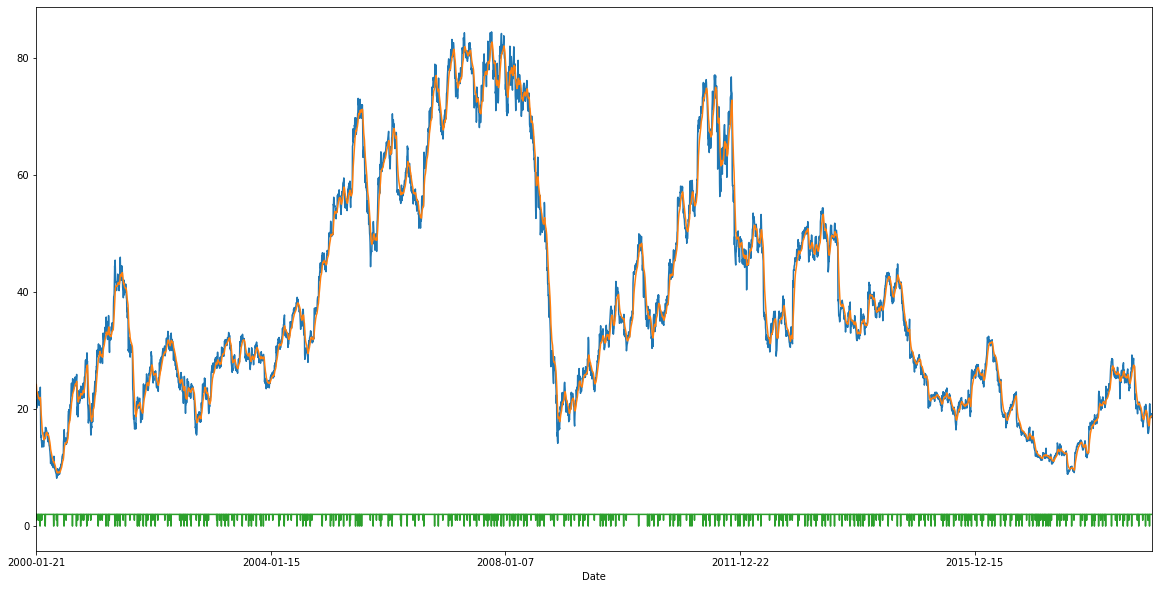

In [12]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

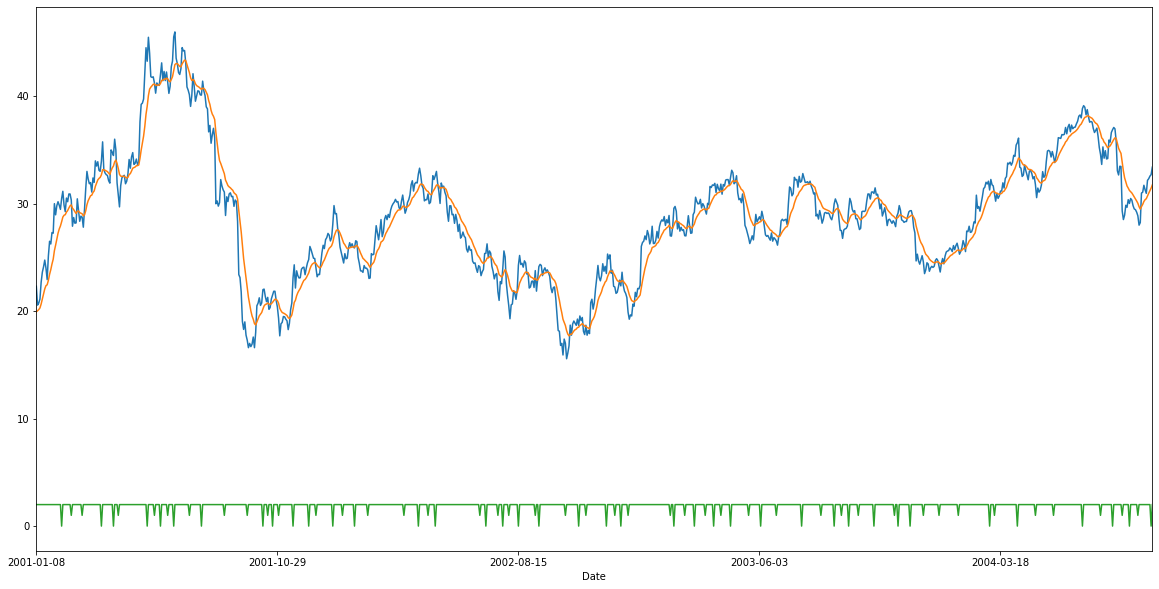

In [13]:
df = df.loc['2001-01-07':'2004-09-19']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [14]:
df.to_csv('accumulation phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [15]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 2001-01-08 to 2004-09-17
Data columns (total 5 columns):
previous_1d    927 non-null float64
EMA_12         927 non-null float64
willr_14       927 non-null float64
OBV_7          927 non-null float64
labels         927 non-null float64
dtypes: float64(5)
memory usage: 43.5+ KB


In [16]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/BA_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,46.5000,43.946622,-19.402985,20099500.0,2.0
2000-01-24,45.6875,44.214450,-29.104478,15707000.0,2.0
2000-01-25,44.3125,44.229534,-45.522388,12400800.0,2.0
2000-01-26,45.6875,44.453837,-34.821429,17458000.0,2.0
2000-01-27,46.1875,44.720554,-27.678571,20548100.0,2.0


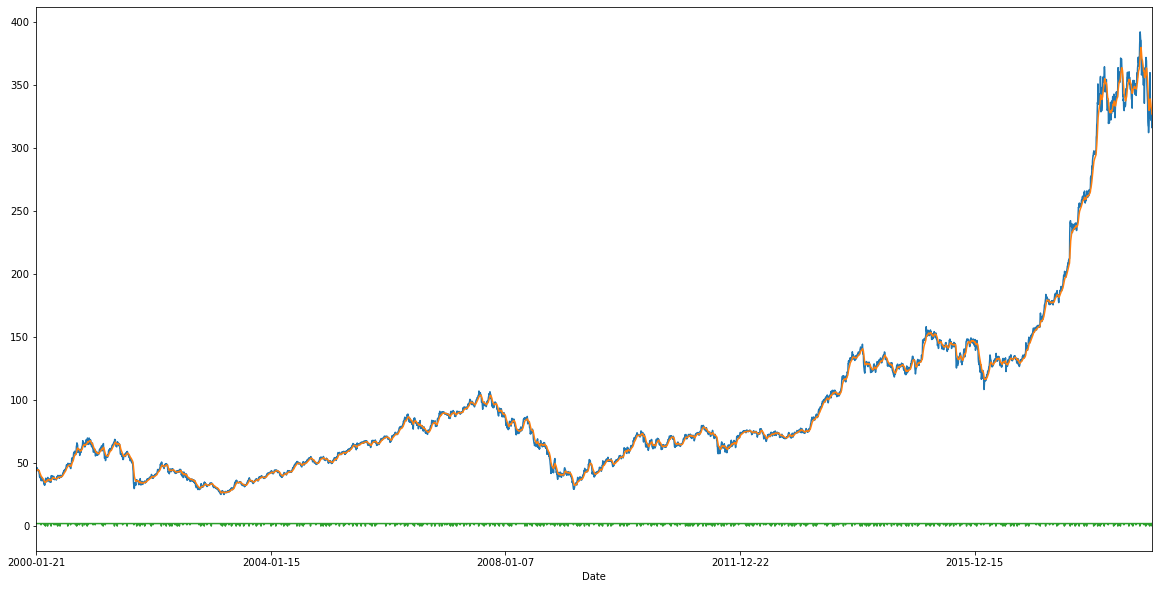

In [17]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

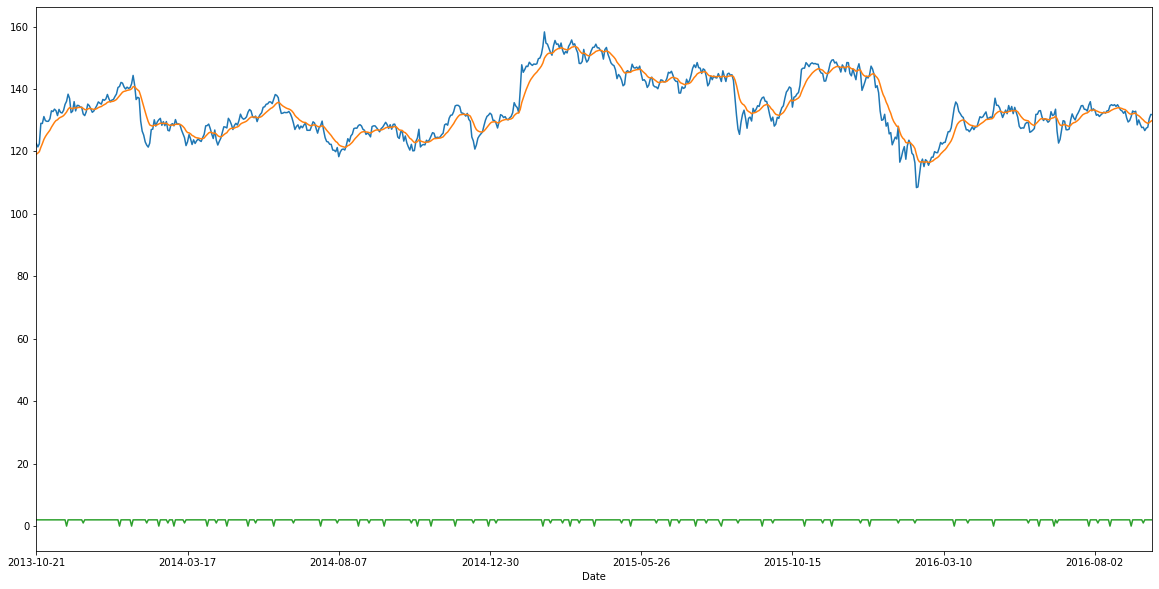

In [18]:
df = df.loc['2013-10-21':'2016-09-26']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [19]:
df.to_csv('accumulation phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [20]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1666 entries, 2001-01-08 to 2016-09-26
Data columns (total 5 columns):
previous_1d    1666 non-null float64
EMA_12         1666 non-null float64
willr_14       1666 non-null float64
OBV_7          1666 non-null float64
labels         1666 non-null float64
dtypes: float64(5)
memory usage: 78.1+ KB


In [21]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/600104.SS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-24,3.189194,3.249583,-69.696967,61394527.0,2.0
2000-01-25,3.205140,3.242745,-79.136806,75032521.0,2.0
2000-01-26,3.402870,3.267380,-34.532549,127274101.0,2.0
2000-01-27,3.284870,3.270071,-62.500055,91746305.0,2.0
2000-01-28,3.252978,3.267441,-69.852957,65314909.0,2.0


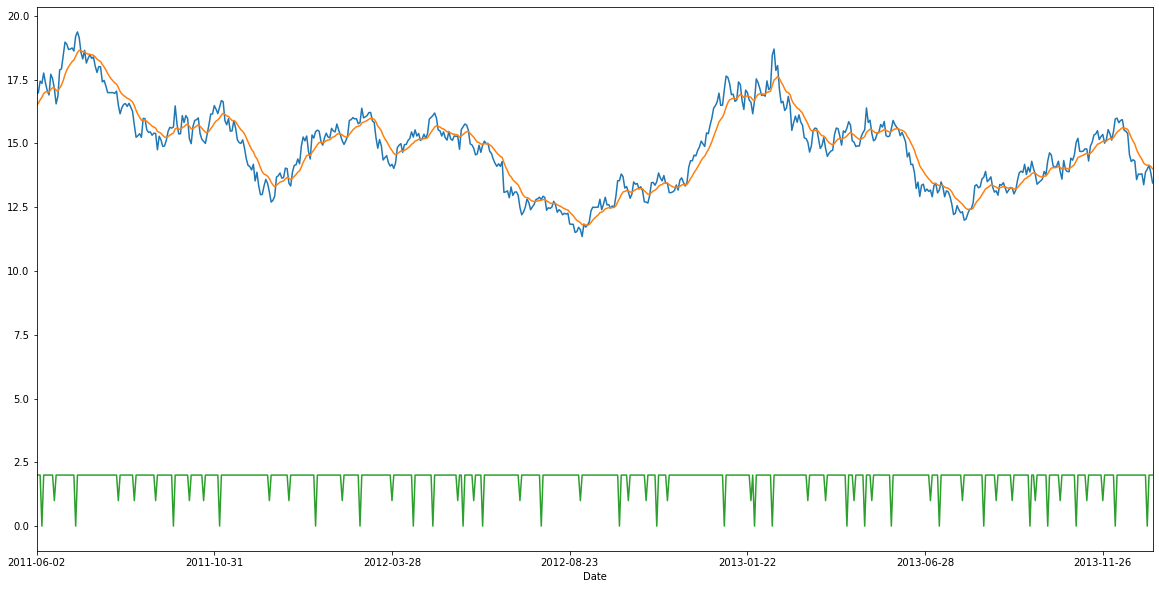

In [22]:
df = df.loc['2011-06-02':'2014-01-06']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [23]:
df.to_csv('accumulation phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [24]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 2001-01-08 to 2014-01-06
Data columns (total 5 columns):
previous_1d    2295 non-null float64
EMA_12         2295 non-null float64
willr_14       2295 non-null float64
OBV_7          2295 non-null float64
labels         2295 non-null float64
dtypes: float64(5)
memory usage: 107.6+ KB


In [25]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/O39.SI_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,6.793788,7.018572,-90.000010,-1965914.0,2.0
2000-01-24,6.890842,6.998922,-77.777802,6276910.0,2.0
2000-01-25,6.793788,6.967363,-85.714286,-511055.0,2.0
2000-01-26,6.745261,6.933193,-86.666549,-7435027.0,2.0
2000-01-27,6.890842,6.926678,-66.666601,-3725757.0,2.0


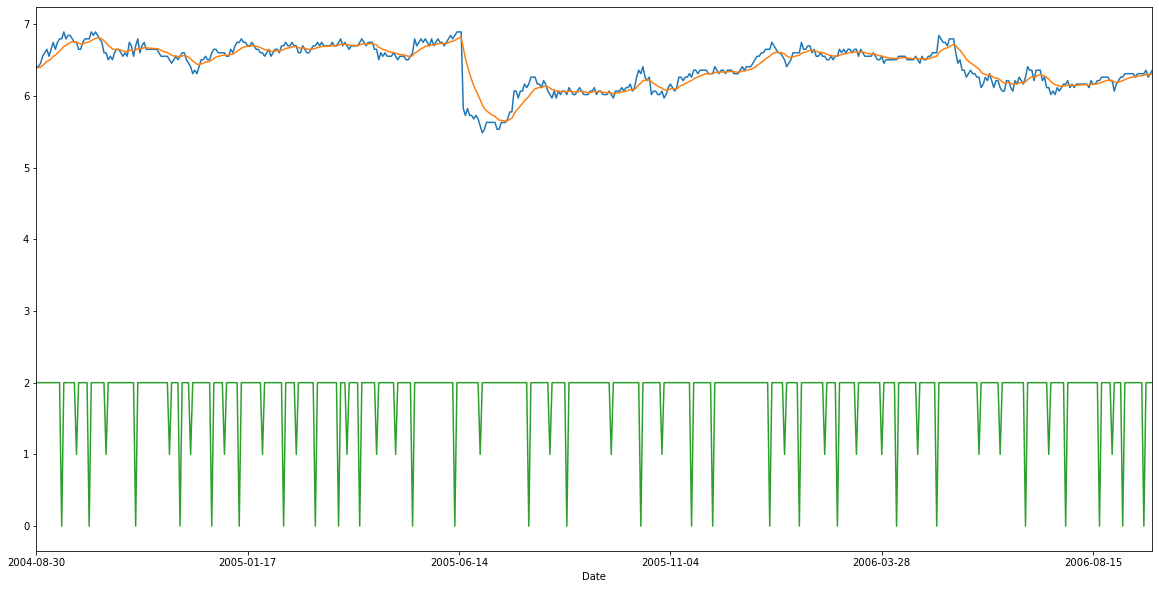

In [26]:
df = df.loc['2004-08-29':'2006-09-24']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [27]:
df.to_csv('accumulation phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [28]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2824 entries, 2001-01-08 to 2006-09-22
Data columns (total 5 columns):
previous_1d    2824 non-null float64
EMA_12         2824 non-null float64
willr_14       2824 non-null float64
OBV_7          2824 non-null float64
labels         2824 non-null float64
dtypes: float64(5)
memory usage: 132.4+ KB


In [29]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/JPM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,49.375000,48.388499,-42.592593,-2894250.0,2.0
2000-01-24,48.625000,48.424884,-39.516144,-8054850.0,2.0
2000-01-25,48.666668,48.462081,-38.709668,-1595700.0,2.0
2000-01-26,49.750000,48.660222,-17.741956,5984250.0,2.0
2000-01-27,52.291668,49.218906,-5.232557,14370900.0,2.0


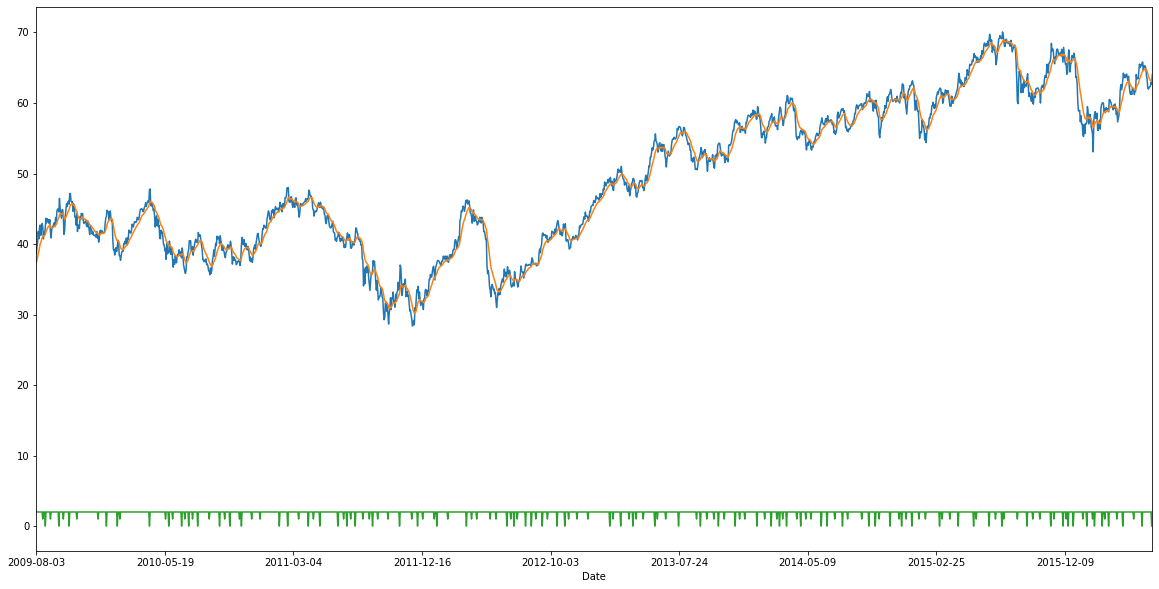

In [30]:
df = df.loc['2009-08-02':'2016-06-26']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [31]:
df.to_csv('accumulation phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [32]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4561 entries, 2001-01-08 to 2016-06-24
Data columns (total 5 columns):
previous_1d    4561 non-null float64
EMA_12         4561 non-null float64
willr_14       4561 non-null float64
OBV_7          4561 non-null float64
labels         4561 non-null float64
dtypes: float64(5)
memory usage: 213.8+ KB


## Test Set

In [36]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/GS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,85.9375,85.447978,-53.992395,1493500.0,2.0
2000-01-24,85.6875,85.484828,-54.296875,951000.0,1.0
2000-01-25,81.7500,84.910239,-69.318182,238100.0,2.0
2000-01-26,83.8750,84.750971,-50.000000,987400.0,2.0
2000-01-27,88.2500,85.289283,-10.465116,2074000.0,2.0


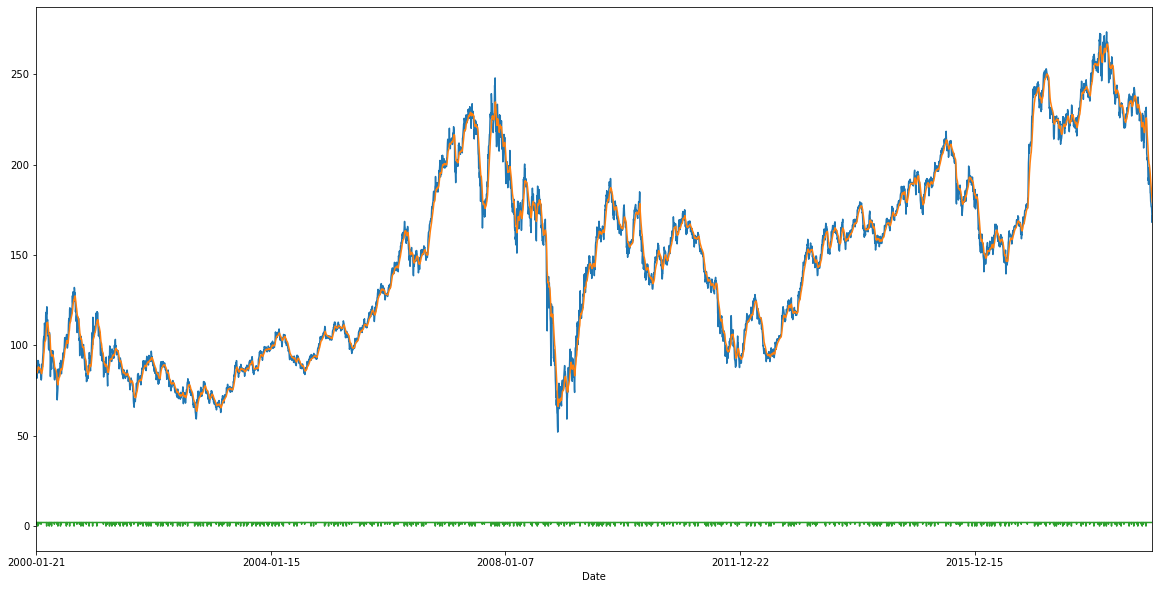

In [37]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

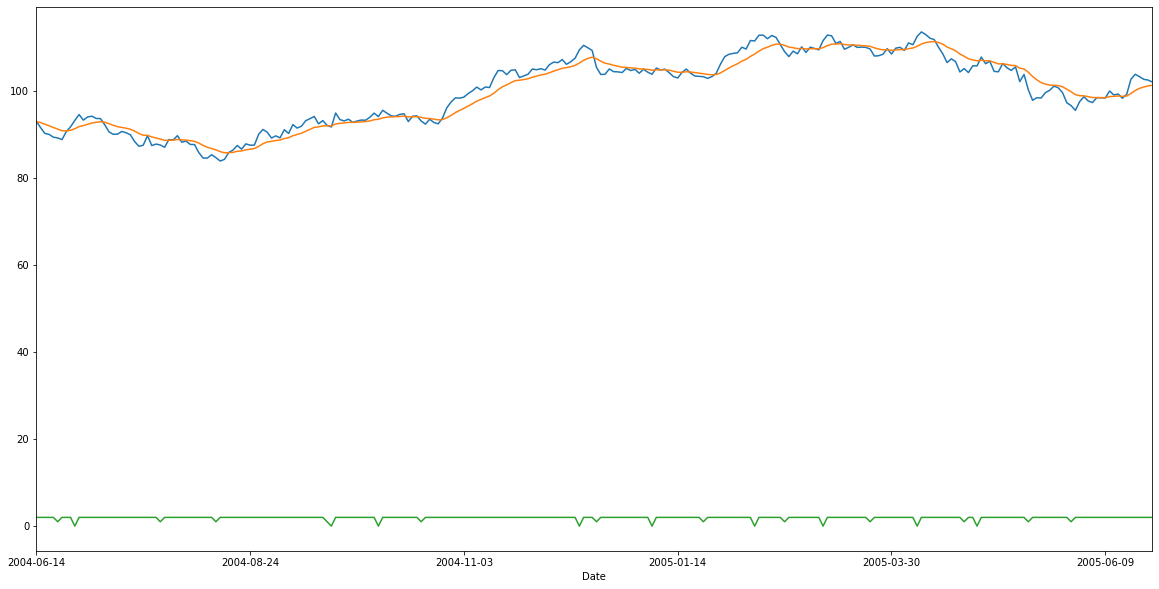

In [38]:
df = df.loc['2004-06-11':'2005-06-26']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [39]:
df.to_csv('accumulation phase data/test_acc_data.csv')